# Exploratory Data Analysis (EDA)
---

## Overview
- Presented summary statistics for the numerical features in the dataset
- Made distribution plots for ‘ratings’, ’prices’, and ‘is_recommended’ columns
- Displayed bar plots displaying , top 10 skincare brands, top 10 most loved products, average prices by category , and most affordable and most expensive skin care brands 
- Created a heatmap to find any correlations within the numeric features 


### Imports

In [15]:
# Imports needed for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Clean Data

In [16]:
# Load in clean reviews data
# ParserError was occuring , added lineterminator='\n' to solve issue
# Code adapted from https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err
df = pd.read_csv('../data/Clean-ALL_reviews.csv', lineterminator='\n', low_memory=False)
df.head()

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,...,product_name,brand_name,price_usd,loves_count,reviews_count,size,variation_type,variation_value,ingredients,category
0,1741593524,5,1,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Not specified,...,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19,177,1,2.4 oz / 70 ml,Size,2.4 oz / 70 ml,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",Cleansers
1,31423088263,1,0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,Not specified,...,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24,1081315,16118,0.7 oz/ 20 g,Color,Original,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Lip Balms & Treatments
2,5061282401,5,1,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,...,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24,1081315,16118,0.7 oz/ 20 g,Color,Original,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Lip Balms & Treatments
3,6083038851,5,1,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Not specified,...,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24,1081315,16118,0.7 oz/ 20 g,Color,Original,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Lip Balms & Treatments
4,47056667835,5,1,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,...,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24,1081315,16118,0.7 oz/ 20 g,Color,Original,"['Diisostearyl Malate, Hydrogenated Polyisobut...",Lip Balms & Treatments


### EDA

#### Summary Statistics

In [17]:
# Present summary stats
round(df.describe(),2)

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,loves_count,reviews_count
count,1.092737e+06,1092737.00,1092737.00,1092737.00,1092737.00,1092737.00,1092737.00,1092737.00,1092737.00
mean,9.186180e+09,4.30,0.84,4.18,0.89,3.29,48.97,106744.30,2159.61
std,9.247664e+09,1.15,0.37,22.73,5.29,19.69,40.09,167544.72,2524.89
min,0.000000e+00,1.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00
25%,2.108853e+09,4.00,1.00,0.00,0.00,0.00,25.00,16632.00,552.00
50%,6.178574e+09,5.00,1.00,0.00,0.00,0.00,39.00,48739.00,1350.00
75%,1.077416e+10,5.00,1.00,3.00,1.00,3.00,62.00,123439.00,2911.00
max,4.755952e+10,5.00,1.00,5464.00,1159.00,5050.00,1900.00,1081315.00,16118.00


Stats Interpretation:

*rating* - The rating scores range from 1-5, with 4.30 being the average rating.

*is_recommended* - 84% of people recommend items. 

*total_feedback_count* - 
The total feedback count is 5,464, with 1,159 counts for negative feedback and 5,050 counts for positive feedback.

*price_usd* -  The least expensive product is priced at 3 dollars while the most expensive product costs 1,900 dollars. An average most products cost 48.97 dollars

*loves_count* - The average love count for each product is about 106,744.30.

*reviews_counts* - The average review count for each product is 2,159.61
    

#### Distribution Plots

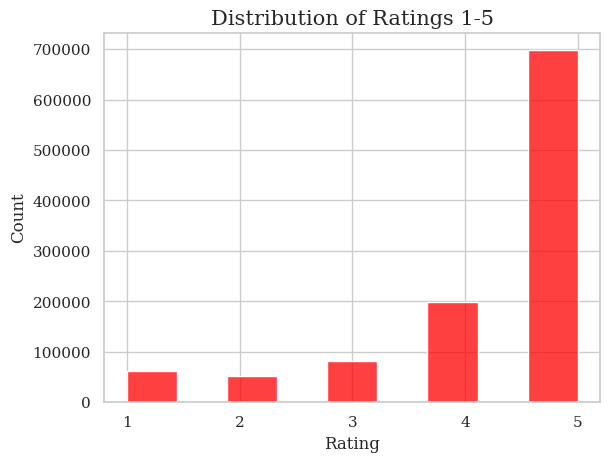

In [18]:
# Plot distribution of ratings
# Code adapted from https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis 
sns.histplot(data= df, x= df['rating'], bins = 9, color = 'red')
plt.title('Distribution of Ratings 1-5', size = 15)
plt.xlabel('Rating')
plt.xticks(range(1, df['rating'].max() + 1))
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif';

In [19]:
# Present numbers from histogram
df['rating'].value_counts()

5    697756
4    199183
3     81747
1     61100
2     52951
Name: rating, dtype: int64

Ratings Distribution Plot Interpretation:

- The majority of products receive ratings of 4 and 5, indicating that the Sephora offers high-quality products that are highly regarded by consumers.

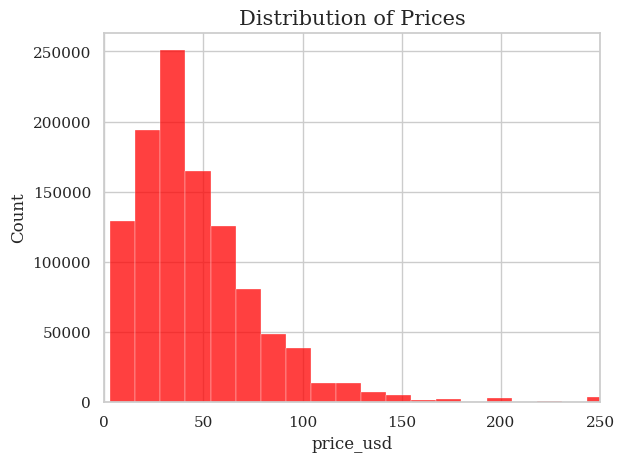

In [20]:
# Plot a histogram to plot the distribution of prices, without outlier 1900
sns.histplot(data=df, x='price_usd', bins=150, color = 'red')
plt.xlim(0, 250)
plt.title('Distribution of Prices', size = 15);

Price Distrubitom Plot Interpretation:

- The majority of products fall within the price range of 20 to 50 dollars, indicating a common price range for most items. However, there is an outlier with a price of 1,900 dollars, not shown above and a few products priced higher than 100 dollars. This shows that the data is not evenly distributed.


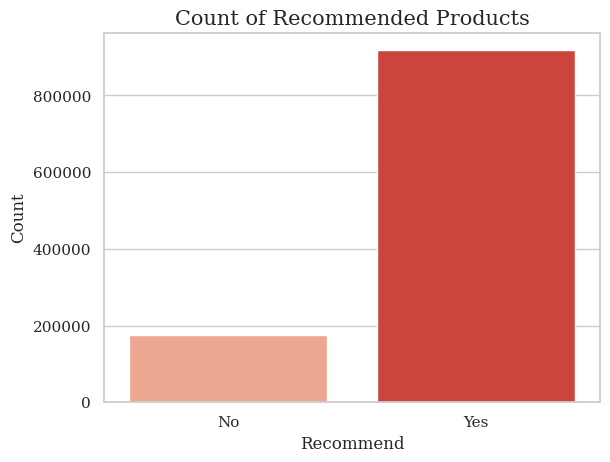

In [21]:
# Plot a countplot for 'is_recommended' column
sns.countplot(x=df['is_recommended'], palette = 'Reds')
plt.title('Count of Recommended Products', size = 15)
plt.xlabel('Recommend')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count');

Recommended Products Countplot Interpretation:

- Majority of products at the store are recommended by their users.There is a significant difference between the number of products that are recommended and those that are not recommended, suggesting that user recommendations play a crucial role in influencing the perception and popularity of the products.


#### Barplots

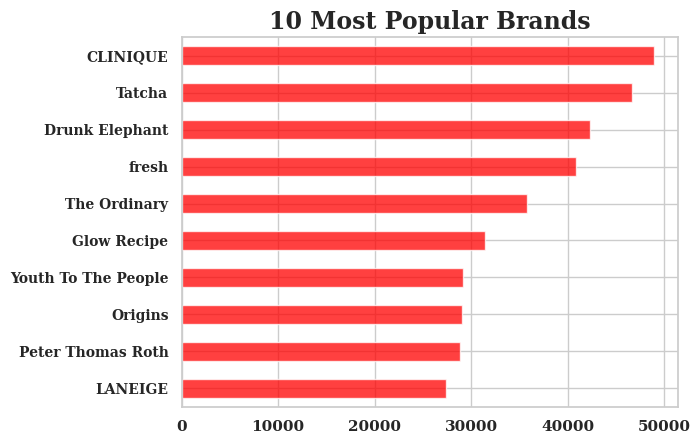

In [37]:
# Identify what are the top 10 most popular skincare brands at Sephora using a barplot
top_brand_10 = df['brand_name'].value_counts().head(10)
top_brand_10.sort_values().plot(kind='barh', color = 'red', alpha= 0.75)
plt.title('10 Most Popular Brands', size=17, fontweight='bold')
plt.yticks(fontweight= 'semibold', size=10)
plt.xticks(fontweight= 'semibold')
plt.grid(True)
# Save this plot for slides
#plt.savefig('10 Most Popular Brands'); Already saved

Barplot Interpretation:

- Plot above displays the top ten most popular skincare brands sold at Sephora.

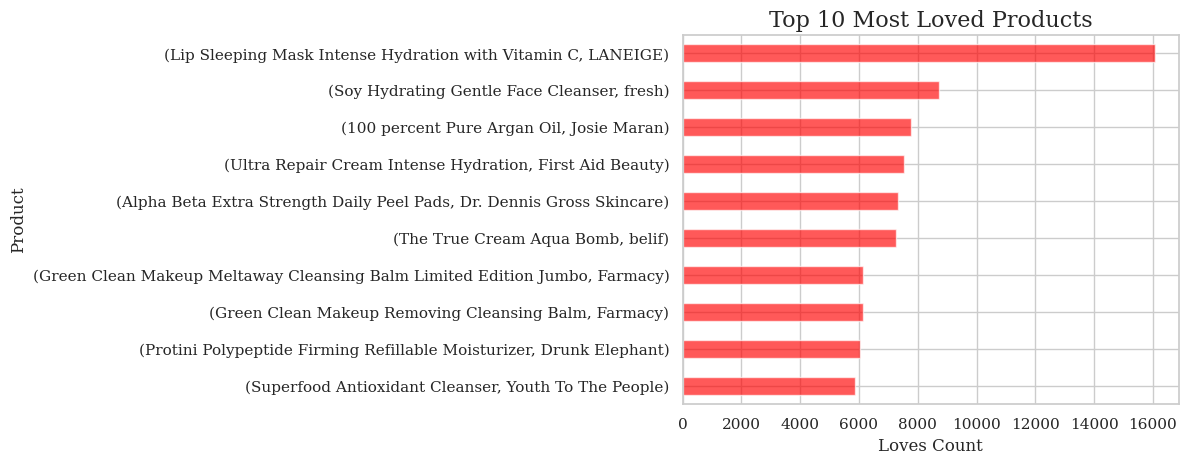

In [23]:
# Groupby brand and product and plot the top ten most loved skincare products
# code adapted from https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis
brand_prod= df.groupby(['product_name','brand_name'])['loves_count'].count()
brand_prod.sort_values(ascending=False).head(10).plot(kind='barh',color = 'red', alpha= 0.65)
plt.gca().invert_yaxis()
plt.xlabel('Loves Count')
plt.ylabel('Product')
plt.title('Top 10 Most Loved Products', size=16);

Barplot Interpretation:

- Plot above displays the top ten products sold at Sephora.

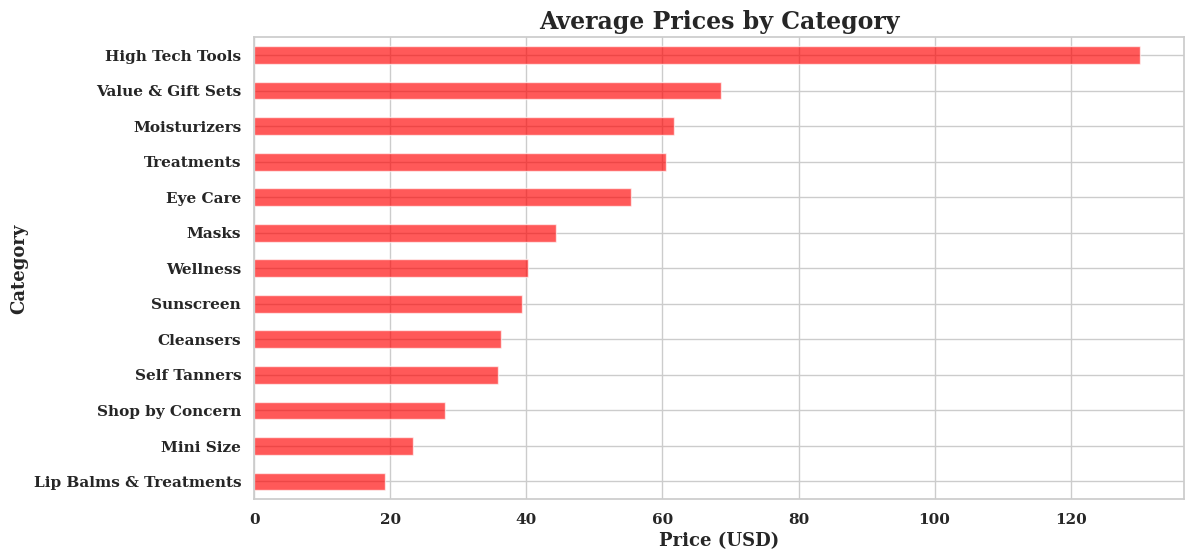

In [42]:
# Plot out the average prices for each skin care category 
cat_price = df.groupby('category')['price_usd'].mean()

# Plot the average prices by secondary category
plt.figure(figsize=(12, 6))
cat_price.sort_values().plot(kind='barh', color = 'red', alpha = 0.65)
plt.title('Average Prices by Category', size=17, fontweight='bold')
plt.xlabel('Price (USD)', fontweight='semibold', size=13)
plt.ylabel('Category', fontweight = 'semibold',size=13 )
plt.yticks(fontweight= 'semibold')
plt.xticks(fontweight= 'semibold')
plt.grid(True)
# Save plot for slides
#plt.savefig('Average Prices by Category'); Already saved

Barplot Interpretation:

- Plot above displays the average price for each skin care category

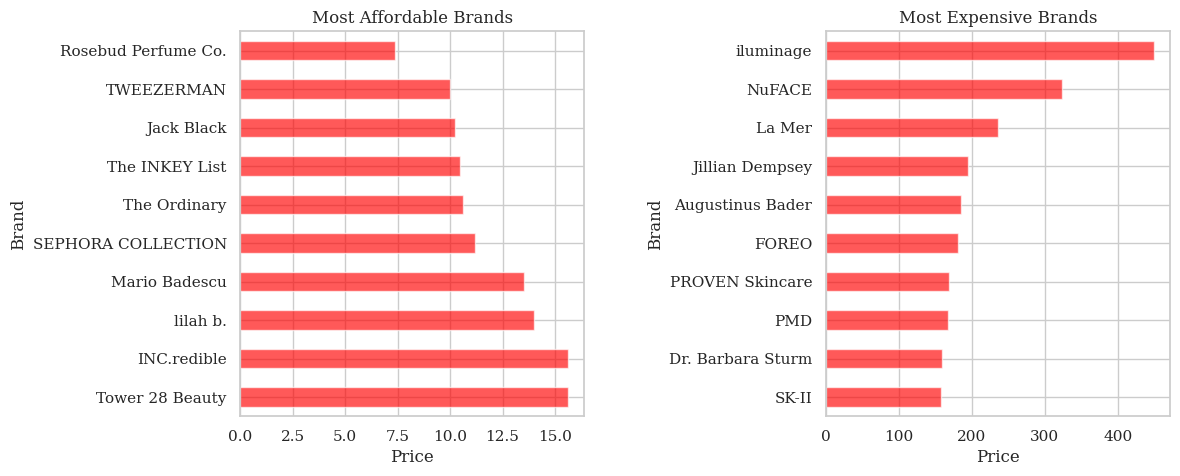

In [44]:
# Plot to show the most affordable and most expensive brands at sephora
fig, ax =  plt.subplots(1, 2, figsize=(12,5))

brand_price = df.groupby('brand_name')['price_usd'].mean()

brand_price.sort_values().head(10).plot(kind='barh', color = 'red', alpha = 0.65, ax=ax[0])
brand_price.sort_values().tail(10).plot(kind='barh', color = 'red', alpha = 0.65, ax=ax[1])

ax[0].set(ylabel= 'Brand', xlabel='Price',title = 'Most Affordable Brands')
ax[1].set(ylabel='Brand', xlabel='Price',title = 'Most Expensive Brands')
ax[0].invert_yaxis()

plt.subplots_adjust(hspace=0.9)
plt.subplots_adjust(wspace=0.7)

# Save plot
#plt.savefig('Most Afforable-Expensive'); Already

Barplot Interpretation:

- Barplots above display the most affordable and most expensive skincare brands at Sephora. 

#### Heatmap

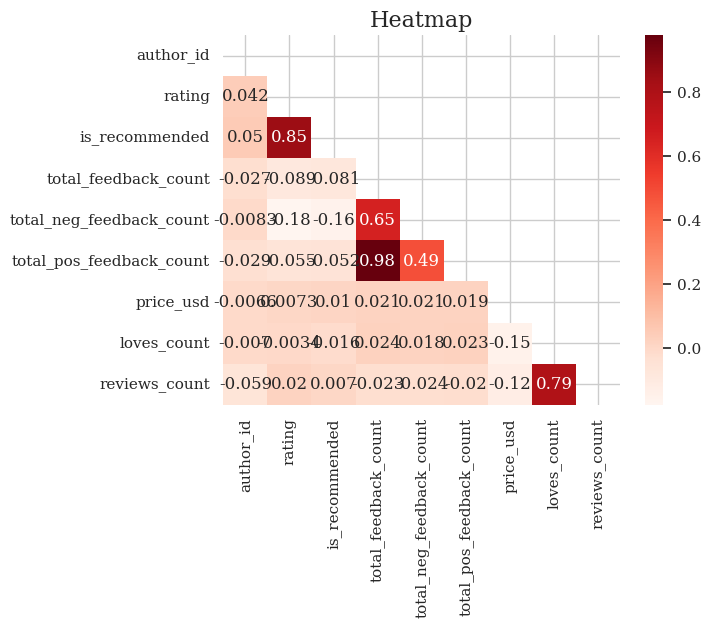

In [26]:
# Create a heatmap to display relationships between numeric features
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='Reds', annot=True, mask=mask)
plt.title('Heatmap',fontsize = 16);


Heatmap Interpretation:

- The highest positive correlation at 98% is seen between 'total_pos_feedback_count' and 'total_feedback_count' , which implies that as total feedback count increases, the majority of the feedback is positive.
- The second highest correlation, which is at 85%, is observed between 'is_recommended' and 'rating'. This indicates that as the rating increases,  a person is more likely to recommend it.
- Overall, most of the correlations seen above are  relatively weak